<a href="https://colab.research.google.com/github/babsyvbabu/INFO6105DataScience/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1 - ML DATA CLEANING AND FEATURE SELECTION
##  <span style="color:gray;font-family: Times New Roman"><u>Data Set - Telco Customers Churn</u></span>

### Author : Babsy Vellera Babu
### NUID : 002774501

# Abstract:

Telco is a fictional telecommunications company that provided home phone and Internet services to 7043 customers in California in Q3. This organization has been observing a lot of customers switching to competitors or terminating their service altogethe. This has caused a huge dent in their quarterly revenues and might drastically affect annual revenues for the ongoing financial year, causing stocks to plunge and market cap to reduce significantly. The idea is to be able to predict which customers are going to churn so that necessary actions/interventions can be taken by the bank to retain such customers.

In this project, we are provided with customer data pertaining to his past transactions with the telco and some demographic information. We use this to establish relations/associations between data features and customer's propensity to churn and build a classification model to predict whether the customer will leave the telco or not. We also go about explaining model predictions through multiple visualizations and give insight into which factor(s) are responsible for the churn of the customers.

# About the data:

The data is obtained from Kaggle. It consists of 7043 rows and 33 columns.
It includes several categorical and numeric variables.

It has several features including (but not limited to) geography, tenure, payment method .etc of unique customers. Such features have contributions towards the churn value. It can help us tell the chances of a customer leaving or staying with Telco.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_excel('Telco_customer_churn.xlsx')

## print shape of dataset with rows and columns
print(dataset.shape)

(7043, 33)


There are 7043 rows and 33 columns

In [ ]:
## print the top5 records
dataset.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4)*100,  ' % missing values')

Churn Reason 73.46000000000001  % missing values


We observe that 73.46% of values in the Churn Reason column are missing. Let us now try to figure out if there is any meaningful relationship between the Churn Value and the absence of Churn Reason

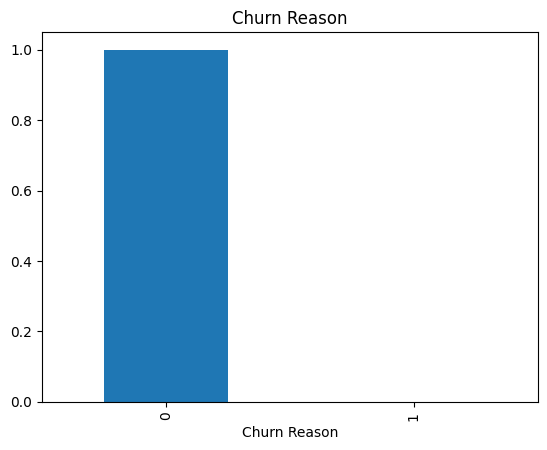

In [ ]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean Churn Value where the information is missing or present
    data.groupby(feature)['Churn Value'].median().plot.bar()
    plt.title(feature)
    plt.show()

As we know from the data, Churn Value is 0 when there is no churn and 1 when the customer has terminated the service.From this graph, we can infer that the Churn reason is missing in those rows where the churn value is 0. There is no record where Churn reason isn't specified and the Churn value is 1 - indicating that there is no churn in that record and hence there is no churn reason. Therefore, we can replace the missing values in the Churn Reason with something meaningful such as "No churn"

In [ ]:
dataset['Churn Reason'].fillna('No churn, customer retained', inplace= True)

In [ ]:
dataset['Churn Reason'].value_counts()

No churn, customer retained                  5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Lack of affordable download/upload speed       44
Long distance charges                          44
Limited range of services                      44
Poor expertise of phone support                20
Poor expertise of online support               19


Thus, we have replaced all the missing values in Churn Reason with meaningful data.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


Count  Zip Code   Latitude   Longitude  Tenure Months  Monthly Charges  \
0      1     90003  33.964131 -118.272783              2            53.85   
1      1     90005  34.059281 -118.307420              2            70.70   
2      1     90006  34.048013 -118.293953              8            99.65   
3      1     90010  34.062125 -118.315709             28           104.80   
4      1     90015  34.039224 -118.266293             49           103.70   

   Churn Value  Churn Score  CLTV  
0            1           86  3239  
1            1           67  2701  
2            1           86  5372  
3            1           84  5003  
4            1           89  5340

There are 9 numerical features: Count, Zip Code, Latitude, Longitude, Tenure Months, Monthly Charges, Churn value, Churn Score, CLTV

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))
categorical_features

Number of categorical variables:  23


['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label']

There are 23 categorical variables

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is CustomerID and number of categories are 7043
The feature is Country and number of categories are 1
The feature is State and number of categories are 1
The feature is City and number of categories are 1129
The feature is Lat Long and number of categories are 1652
The feature is Gender and number of categories are 2
The feature is Senior Citizen and number of categories are 2
The feature is Partner and number of categories are 2
The feature is Dependents and number of categories are 2
The feature is Phone Service and number of categories are 2
The feature is Multiple Lines and number of categories are 3
The feature is Internet Service and number of categories are 3
The feature is Online Security and number of categories are 3
The feature is Online Backup and number of categories are 3
The feature is Device Protection and number of categories are 3
The feature is Tech Support and number of categories are 3
The feature is Streaming TV and number of categories are 3
The featu

For the purpose of analysis, we can see that the country and state have the same value throughout and hence do not reveal anything meaningful so we can discard them. These are the values that are being discarded in the analysis:
1. CustomerID : Bears no impact on the analysis
2. Count: Count is 1 for all rows, indicates unique customer - not useful
3. Country: United States for all rows so has no significant impact on analysis
4. State: California for all rows so has no significant impact on analysis
5. Lat Long: Will not be using for analysis since already have city info
6. Latitude: Will not be using for analysis since already have city info
7. Longitude: Will not be using for analysis since already have city info
8. Zip Code: Will not be using for analysis since already have city info
9. CLTV: Not being used for analysis

In [ ]:
## dropping columns
drop_cols = ['CustomerID', 'Count', 'Country', 'Lat Long', 'Latitude', 'Longitude', 'State','CLTV', 'Zip Code']
dataset.drop(columns = drop_cols, inplace = True)

In [ ]:
dataset.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'Churn Reason'],
      dtype='object')

## Plotting histograms for numeric variables to identify likely distributions


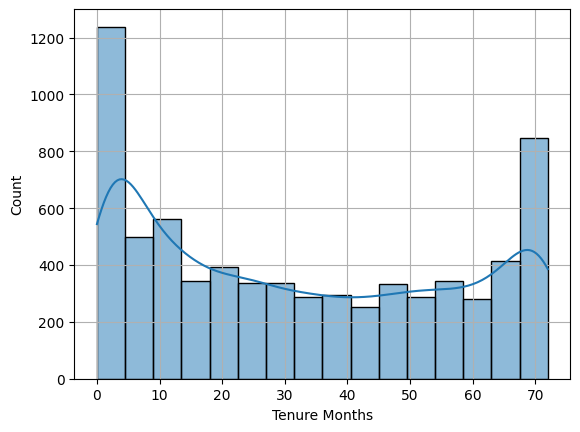

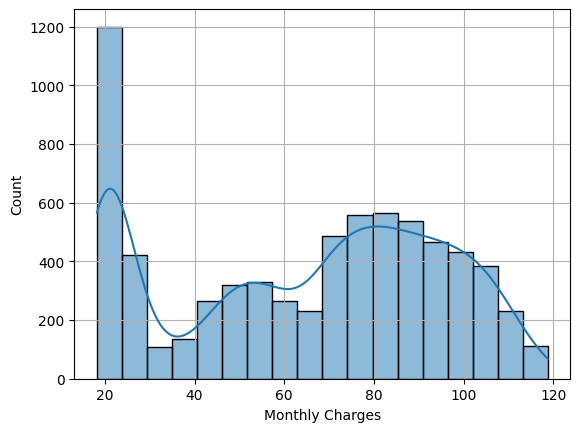

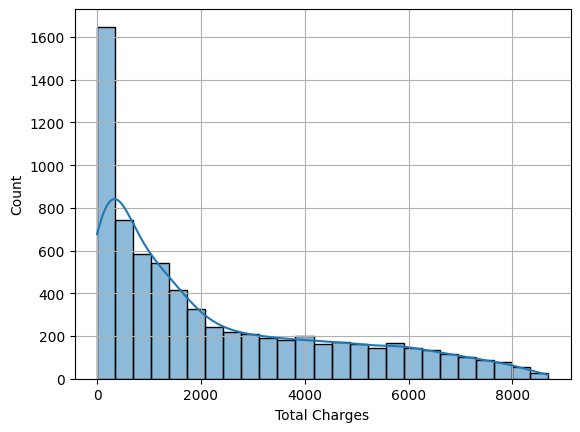

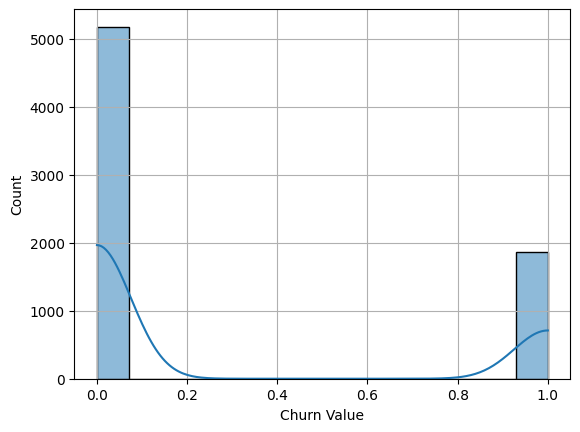

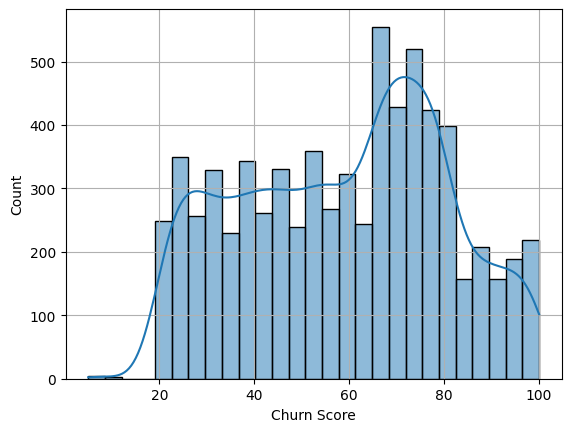

In [ ]:
#x-axis : Variable


#y-axis : Count
#checking the distribution of independent variables
import seaborn as sns
import matplotlib.pyplot as plt

dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')
dataset.loc[dataset['Total Charges'].isnull()==True,'Total Charges'] = dataset['Monthly Charges'] * dataset['Tenure Months']

def draw_distribution(df,feature):
    """
    density
    """

    sns.histplot(df[feature], kde=True)
    plt.show()

feature_list = [
        'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score',
       ]

for i in feature_list:
    plt.grid(True)
    draw_distribution(dataset,i)
    plt.show()

### UNIVARIATE ANALYSIS

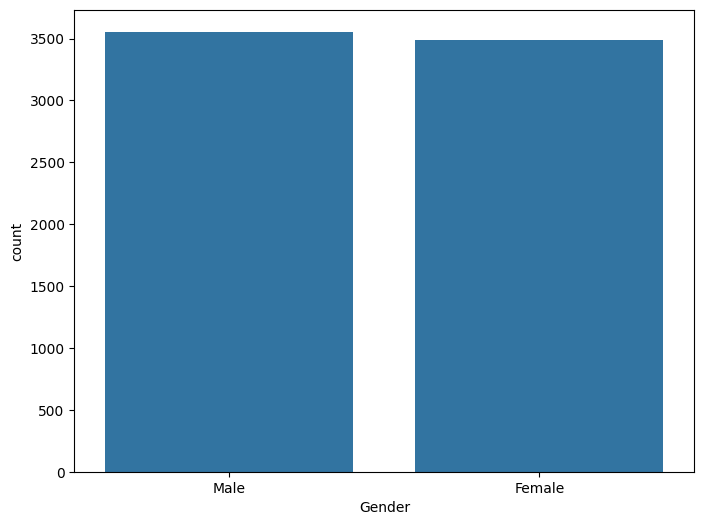

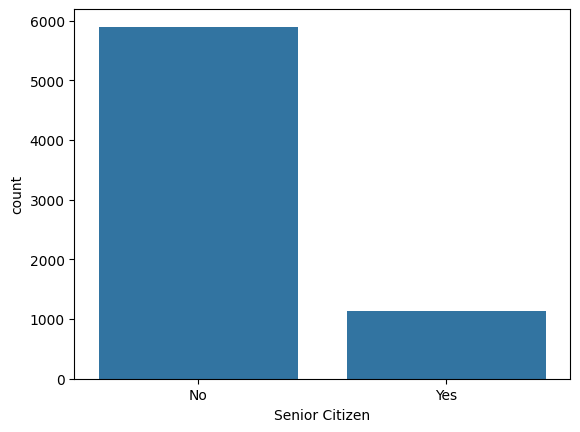

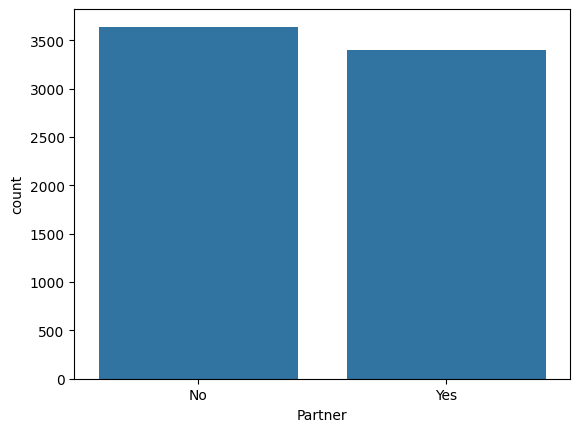

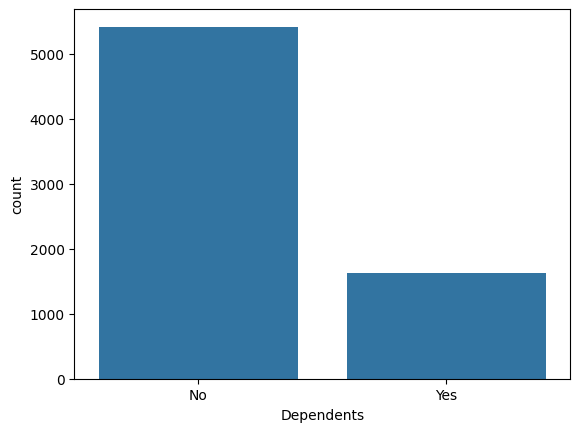

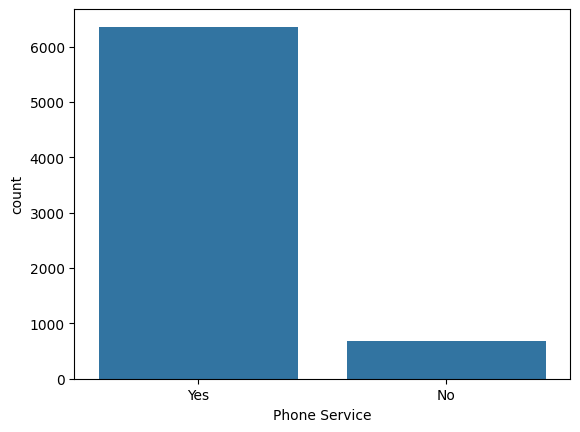

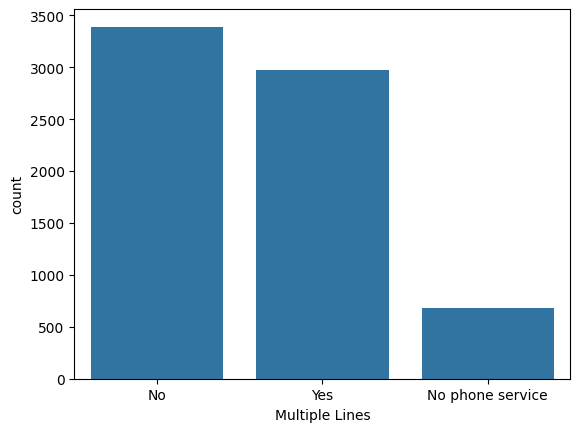

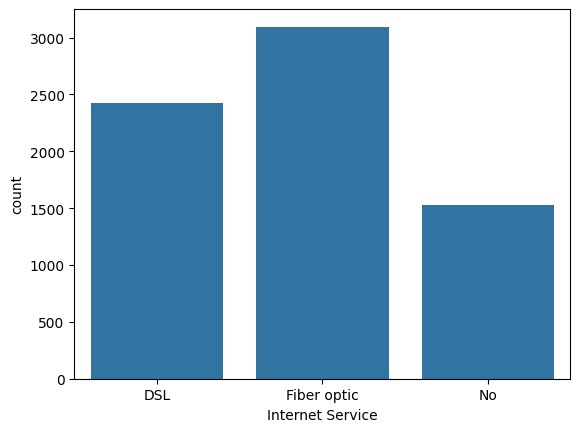

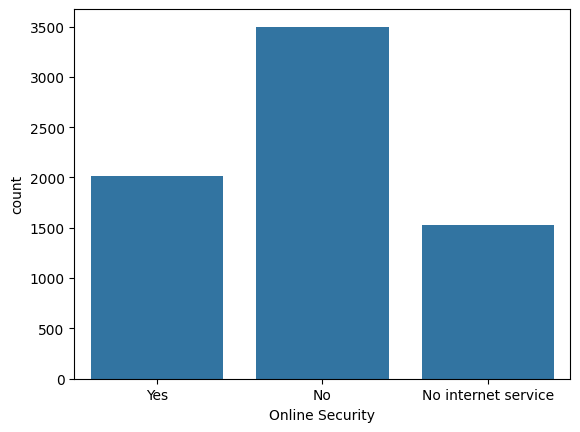

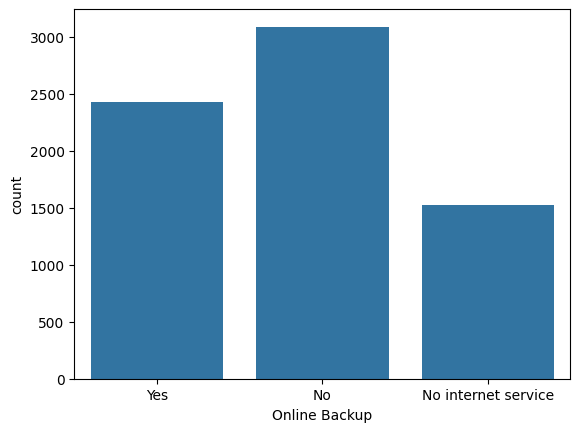

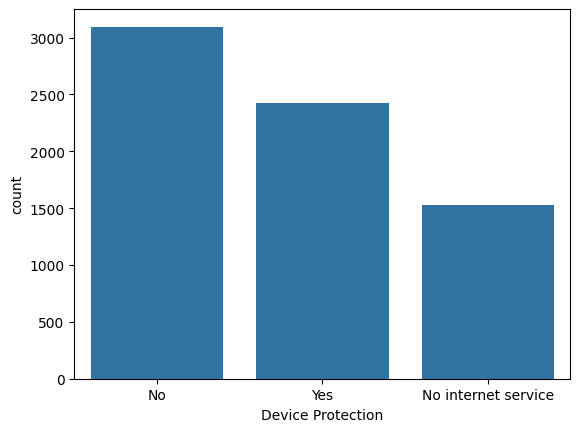

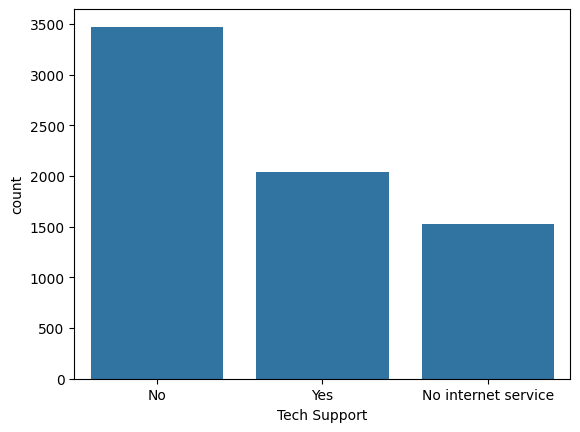

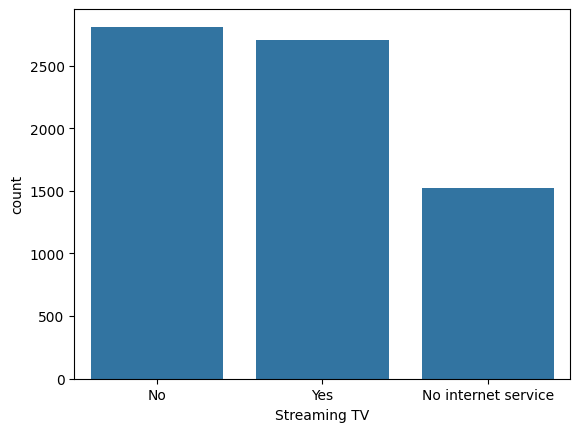

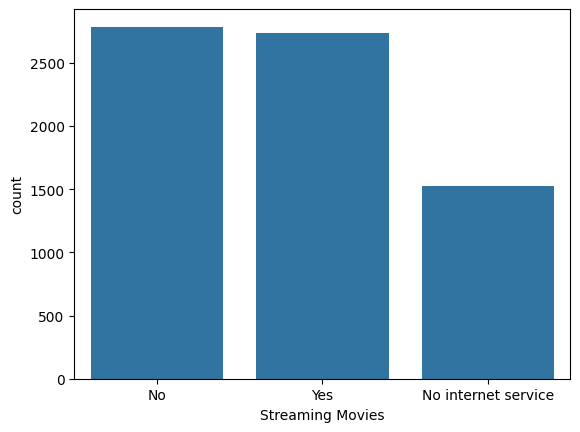

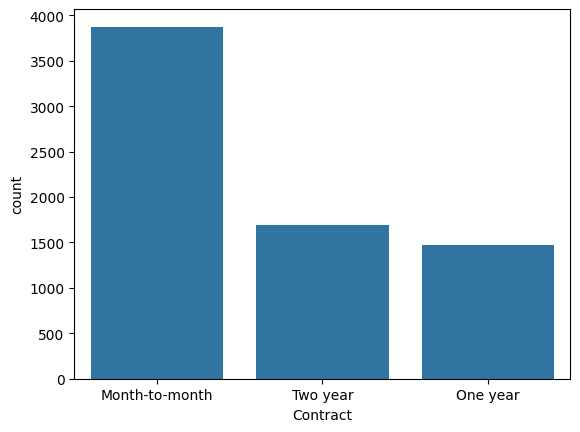

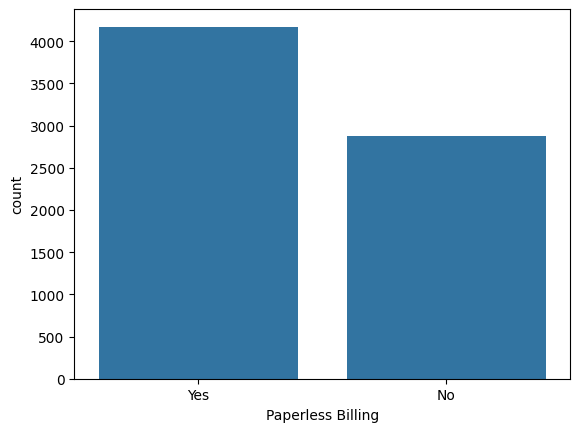

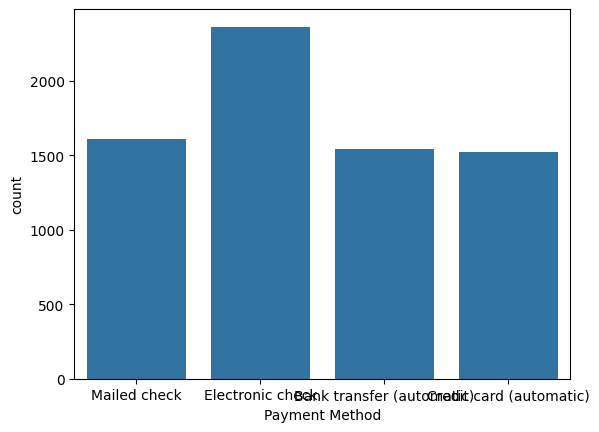

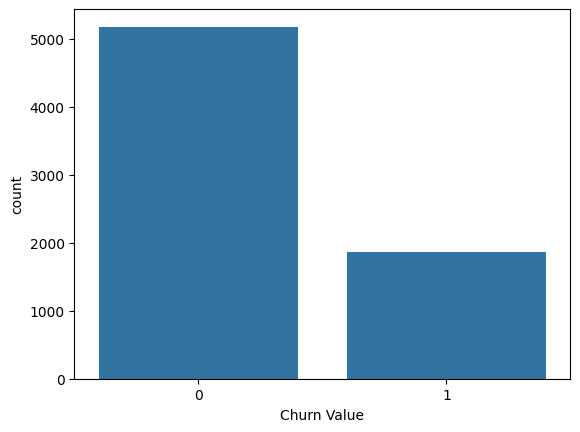

In [ ]:
cols = ["Gender" ,"Senior Citizen" ,"Partner" , "Dependents" ,"Phone Service" ,"Multiple Lines" ,"Internet Service" ,'Online Security','Online Backup',
          'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing','Payment Method', 'Churn Value']

plt.figure(figsize = (8,6))
for feature in cols:
    sns.countplot(x = feature , data = dataset)
    print()
    plt.show()

In [ ]:
dataset.describe()

Tenure Months  Monthly Charges  Total Charges  Churn Value  Churn Score
count    7043.000000      7043.000000    7043.000000  7043.000000  7043.000000
mean       32.371149        64.761692    2279.734304     0.265370    58.699418
std        24.559481        30.090047    2266.794470     0.441561    21.525131
min         0.000000        18.250000       0.000000     0.000000     5.000000
25%         9.000000        35.500000     398.550000     0.000000    40.000000
50%        29.000000        70.350000    1394.550000     0.000000    61.000000
75%        55.000000        89.850000    3786.600000     1.000000    75.000000
max        72.000000       118.750000    8684.800000     1.000000   100.000000

The ranges of all the variables make sense according to the definition of variables.

## BIVARIATE ANALYSIS

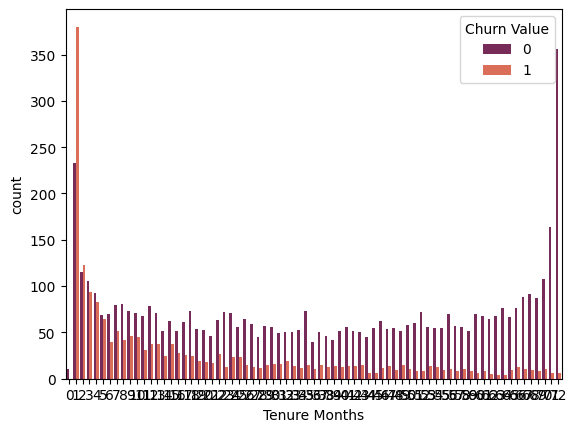

In [ ]:
sns.countplot(data = dataset , x = "Tenure Months", hue= "Churn Value" , palette = "rocket")
plt.show()

## Encoding

**Label Encoding:** Each label is assigned a unique integer based on alphabetical ordering

**We fit only on train dataset as that's the only data we'll assume we have. We'll treat validation and test sets as unseen data. Hence, they can't be used for fitting the encoders.**
### Label encoding for categorical variables

In [ ]:
cat_col = dataset.select_dtypes(include = "object")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_col:
    dataset[i] = le.fit_transform(dataset[i])

## Correlation matrix

In [ ]:
correlation = dataset.corr()
dataset.corr()

City    Gender  Senior Citizen   Partner  Dependents  \
City               1.000000  0.010222       -0.010790  0.024217    0.000849   
Gender             0.010222  1.000000       -0.001874 -0.001808    0.005229   
Senior Citizen    -0.010790 -0.001874        1.000000  0.016479   -0.174396   
Partner            0.024217 -0.001808        0.016479  1.000000    0.363430   
Dependents         0.000849  0.005229       -0.174396  0.363430    1.000000   
Tenure Months      0.021627  0.005106        0.016567  0.379697    0.131376   
Phone Service      0.002900 -0.006488        0.008576  0.017706    0.000625   
Multiple Lines     0.008507 -0.006739        0.146185  0.142410   -0.028842   
Internet Service   0.001369 -0.000863       -0.032310  0.000891    0.082993   
Online Security    0.014561 -0.015017       -0.128221  0.150828    0.135434   
Online Backup      0.001824 -0.012057       -0.013632  0.153130    0.084299   
Device Protection  0.008541  0.000549       -0.021398  0.166330    0.056460   
Tech Support      -0.005781 -0.006825       -0.151268  0.126733    0.112662   
Streaming TV       0.016033 -0.006421        0.030776  0.137341    0.016671   
Streaming Movies   0.017163 -0.008743        0.047266  0.129574   -0.000669   
Contract           0.011248  0.000126       -0.142554  0.294806    0.202279   
Paperless Billing  0.007985 -0.011754        0.156530 -0.014877   -0.118963   
Payment Method    -0.014919  0.017352       -0.038551 -0.154798   -0.025370   
Monthly Charges    0.009145 -0.014569        0.220173  0.096848   -0.144206   
Total Charges      0.020895 -0.000080        0.103006  0.317504    0.030590   
Churn Label        0.008160 -0.008612        0.150889 -0.150448   -0.248542   
Churn Value        0.008160 -0.008612        0.150889 -0.150448   -0.248542   
Churn Score        0.003312  0.000311        0.102181 -0.111013   -0.174950   
Churn Reason       0.004615  0.008661       -0.103521  0.111753    0.183097   

                   Tenure Months  Phone Service  Multiple Lines  \
City                    0.021627       0.002900        0.008507   
Gender                  0.005106      -0.006488       -0.006739   
Senior Citizen          0.016567       0.008576        0.146185   
Partner                 0.379697       0.017706        0.142410   
Dependents              0.131376       0.000625       -0.028842   
Tenure Months           1.000000       0.008448        0.343032   
Phone Service           0.008448       1.000000       -0.020538   
Multiple Lines          0.343032      -0.020538        1.000000   
Internet Service       -0.030359       0.387436       -0.109216   
Online Security         0.325468      -0.015198        0.007141   
Online Backup           0.370876       0.024105        0.117327   
Device Protection       0.371105       0.003727        0.122318   
Tech Support            0.322942      -0.019158        0.011466   
Streaming TV            0.289373       0.055353        0.175059   
Streaming Movies        0.296866       0.043870        0.180957   
Contract                0.671607       0.002247        0.110842   
Paperless Billing       0.006152       0.016505        0.165146   
Payment Method         -0.370436      -0.004184       -0.176793   
Monthly Charges         0.247900       0.247398        0.433576   
Total Charges           0.826178       0.113214        0.452577   
Churn Label            -0.352229       0.011942        0.038037   
Churn Value            -0.352229       0.011942        0.038037   
Churn Score            -0.224987       0.024136        0.037516   
Churn Reason            0.251059      -0.007842       -0.021168   

                   Internet Service  Online Security  Online Backup  \
City                       0.001369         0.014561       0.001824   
Gender                    -0.000863        -0.015017      -0.012057   
Senior Citizen            -0.032310        -0.128221      -0.013632   
Partner                    0.000891         0.150828       0.153130   
Dependents      

In [ ]:
print(correlation['Churn Value'].sort_values(ascending=False), '\n')

Churn Value          1.000000
Churn Label          1.000000
Churn Score          0.664897
Monthly Charges      0.193356
Paperless Billing    0.191825
Senior Citizen       0.150889
Payment Method       0.107062
Multiple Lines       0.038037
Phone Service        0.011942
City                 0.008160
Gender              -0.008612
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
Partner             -0.150448
Device Protection   -0.178134
Online Backup       -0.195525
Total Charges       -0.198324
Dependents          -0.248542
Tech Support        -0.282492
Online Security     -0.289309
Tenure Months       -0.352229
Contract            -0.396713
Churn Reason        -0.698170
Name: Churn Value, dtype: float64 



#### Observation

We can see that the Contract, Tenure Months are inversely related to the Churn Value

Text(0.5, 1.0, 'Multi-Collinearity of Features')

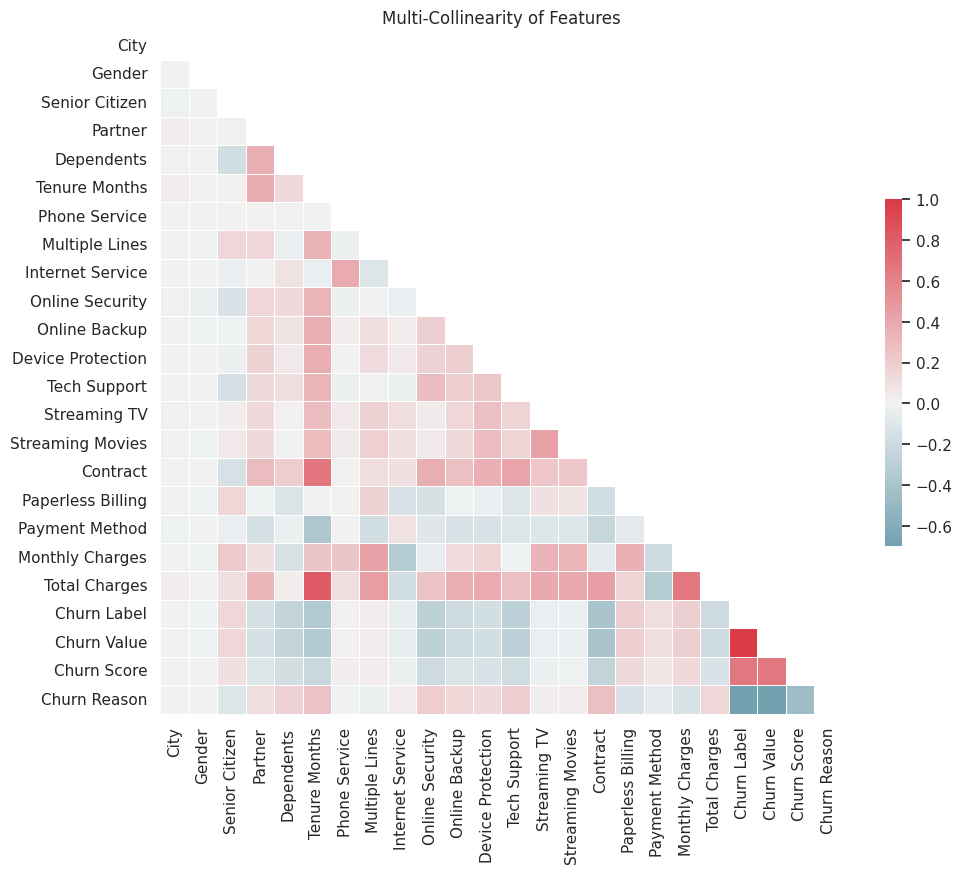

In [ ]:
#correlation of predictors
# plt.figure(figsize = (20,10))
# sns.heatmap(dataset.corr() , annot = True ,linewidths=0.6,linecolor='white' )
# plt.show()

sns.set(style="white")
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

#### Observation
We can see that the toal charges and tenure months have a high direct correlation, so does the contract and tenure months. When we compare the correlation between churn value and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity

### 1. Pearson Correlation

* The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

* The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

**Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))**

* The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation.

* A value of 0 means no correlation.

* The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [ ]:
dataset_copy = dataset.copy()

In [ ]:
## Check Pearsons correlation between individual features and the target variable
corr = dataset_copy.corr(method = 'pearson')
corr

City    Gender  Senior Citizen   Partner  Dependents  \
City               1.000000  0.010222       -0.010790  0.024217    0.000849   
Gender             0.010222  1.000000       -0.001874 -0.001808    0.005229   
Senior Citizen    -0.010790 -0.001874        1.000000  0.016479   -0.174396   
Partner            0.024217 -0.001808        0.016479  1.000000    0.363430   
Dependents         0.000849  0.005229       -0.174396  0.363430    1.000000   
Tenure Months      0.021627  0.005106        0.016567  0.379697    0.131376   
Phone Service      0.002900 -0.006488        0.008576  0.017706    0.000625   
Multiple Lines     0.008507 -0.006739        0.146185  0.142410   -0.028842   
Internet Service   0.001369 -0.000863       -0.032310  0.000891    0.082993   
Online Security    0.014561 -0.015017       -0.128221  0.150828    0.135434   
Online Backup      0.001824 -0.012057       -0.013632  0.153130    0.084299   
Device Protection  0.008541  0.000549       -0.021398  0.166330    0.056460   
Tech Support      -0.005781 -0.006825       -0.151268  0.126733    0.112662   
Streaming TV       0.016033 -0.006421        0.030776  0.137341    0.016671   
Streaming Movies   0.017163 -0.008743        0.047266  0.129574   -0.000669   
Contract           0.011248  0.000126       -0.142554  0.294806    0.202279   
Paperless Billing  0.007985 -0.011754        0.156530 -0.014877   -0.118963   
Payment Method    -0.014919  0.017352       -0.038551 -0.154798   -0.025370   
Monthly Charges    0.009145 -0.014569        0.220173  0.096848   -0.144206   
Total Charges      0.020895 -0.000080        0.103006  0.317504    0.030590   
Churn Label        0.008160 -0.008612        0.150889 -0.150448   -0.248542   
Churn Value        0.008160 -0.008612        0.150889 -0.150448   -0.248542   
Churn Score        0.003312  0.000311        0.102181 -0.111013   -0.174950   
Churn Reason       0.004615  0.008661       -0.103521  0.111753    0.183097   

                   Tenure Months  Phone Service  Multiple Lines  \
City                    0.021627       0.002900        0.008507   
Gender                  0.005106      -0.006488       -0.006739   
Senior Citizen          0.016567       0.008576        0.146185   
Partner                 0.379697       0.017706        0.142410   
Dependents              0.131376       0.000625       -0.028842   
Tenure Months           1.000000       0.008448        0.343032   
Phone Service           0.008448       1.000000       -0.020538   
Multiple Lines          0.343032      -0.020538        1.000000   
Internet Service       -0.030359       0.387436       -0.109216   
Online Security         0.325468      -0.015198        0.007141   
Online Backup           0.370876       0.024105        0.117327   
Device Protection       0.371105       0.003727        0.122318   
Tech Support            0.322942      -0.019158        0.011466   
Streaming TV            0.289373       0.055353        0.175059   
Streaming Movies        0.296866       0.043870        0.180957   
Contract                0.671607       0.002247        0.110842   
Paperless Billing       0.006152       0.016505        0.165146   
Payment Method         -0.370436      -0.004184       -0.176793   
Monthly Charges         0.247900       0.247398        0.433576   
Total Charges           0.826178       0.113214        0.452577   
Churn Label            -0.352229       0.011942        0.038037   
Churn Value            -0.352229       0.011942        0.038037   
Churn Score            -0.224987       0.024136        0.037516   
Churn Reason            0.251059      -0.007842       -0.021168   

                   Internet Service  Online Security  Online Backup  \
City                       0.001369         0.014561       0.001824   
Gender                    -0.000863        -0.015017      -0.012057   
Senior Citizen            -0.032310        -0.128221      -0.013632   
Partner                    0.000891         0.150828       0.153130   
Dependents      

<Axes: >

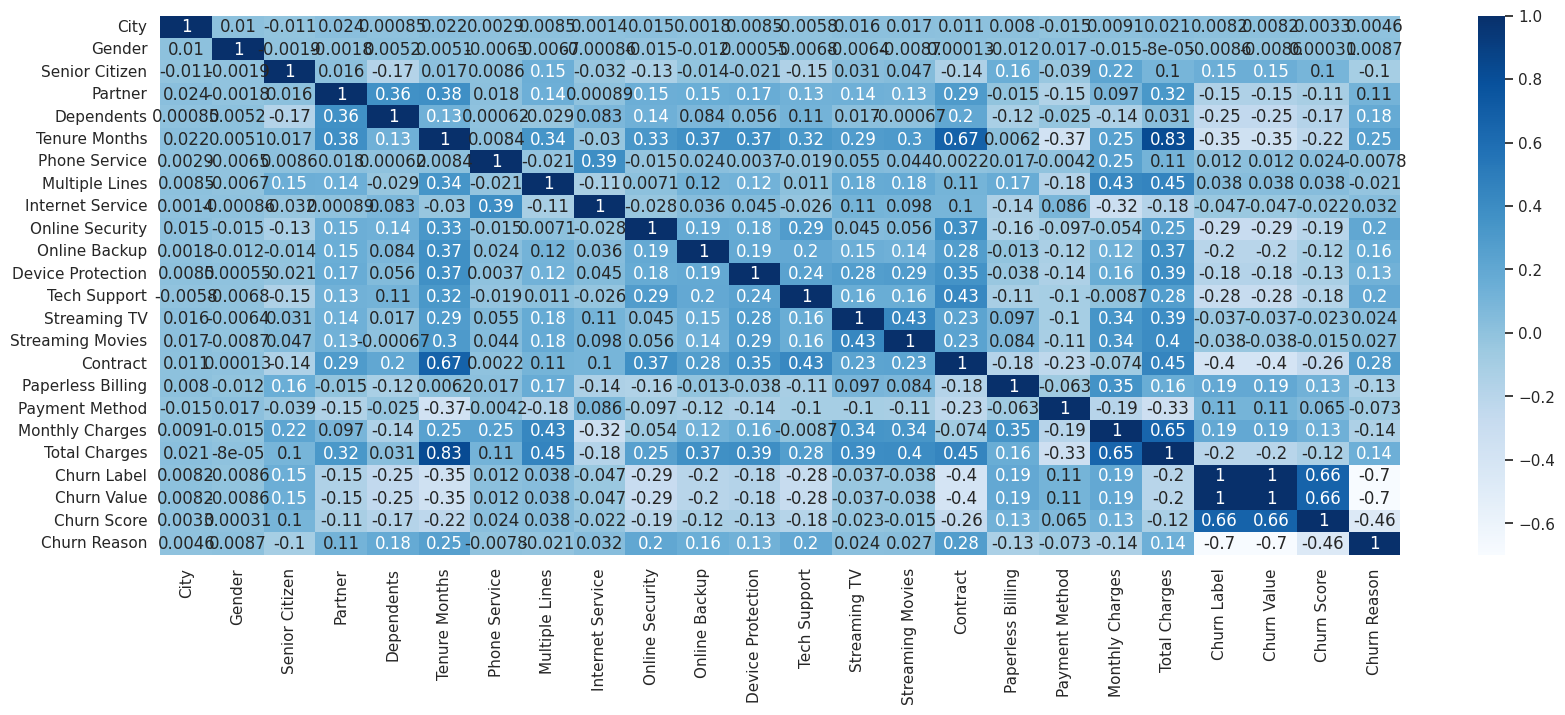

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(corr, cmap = 'Blues', annot= True)

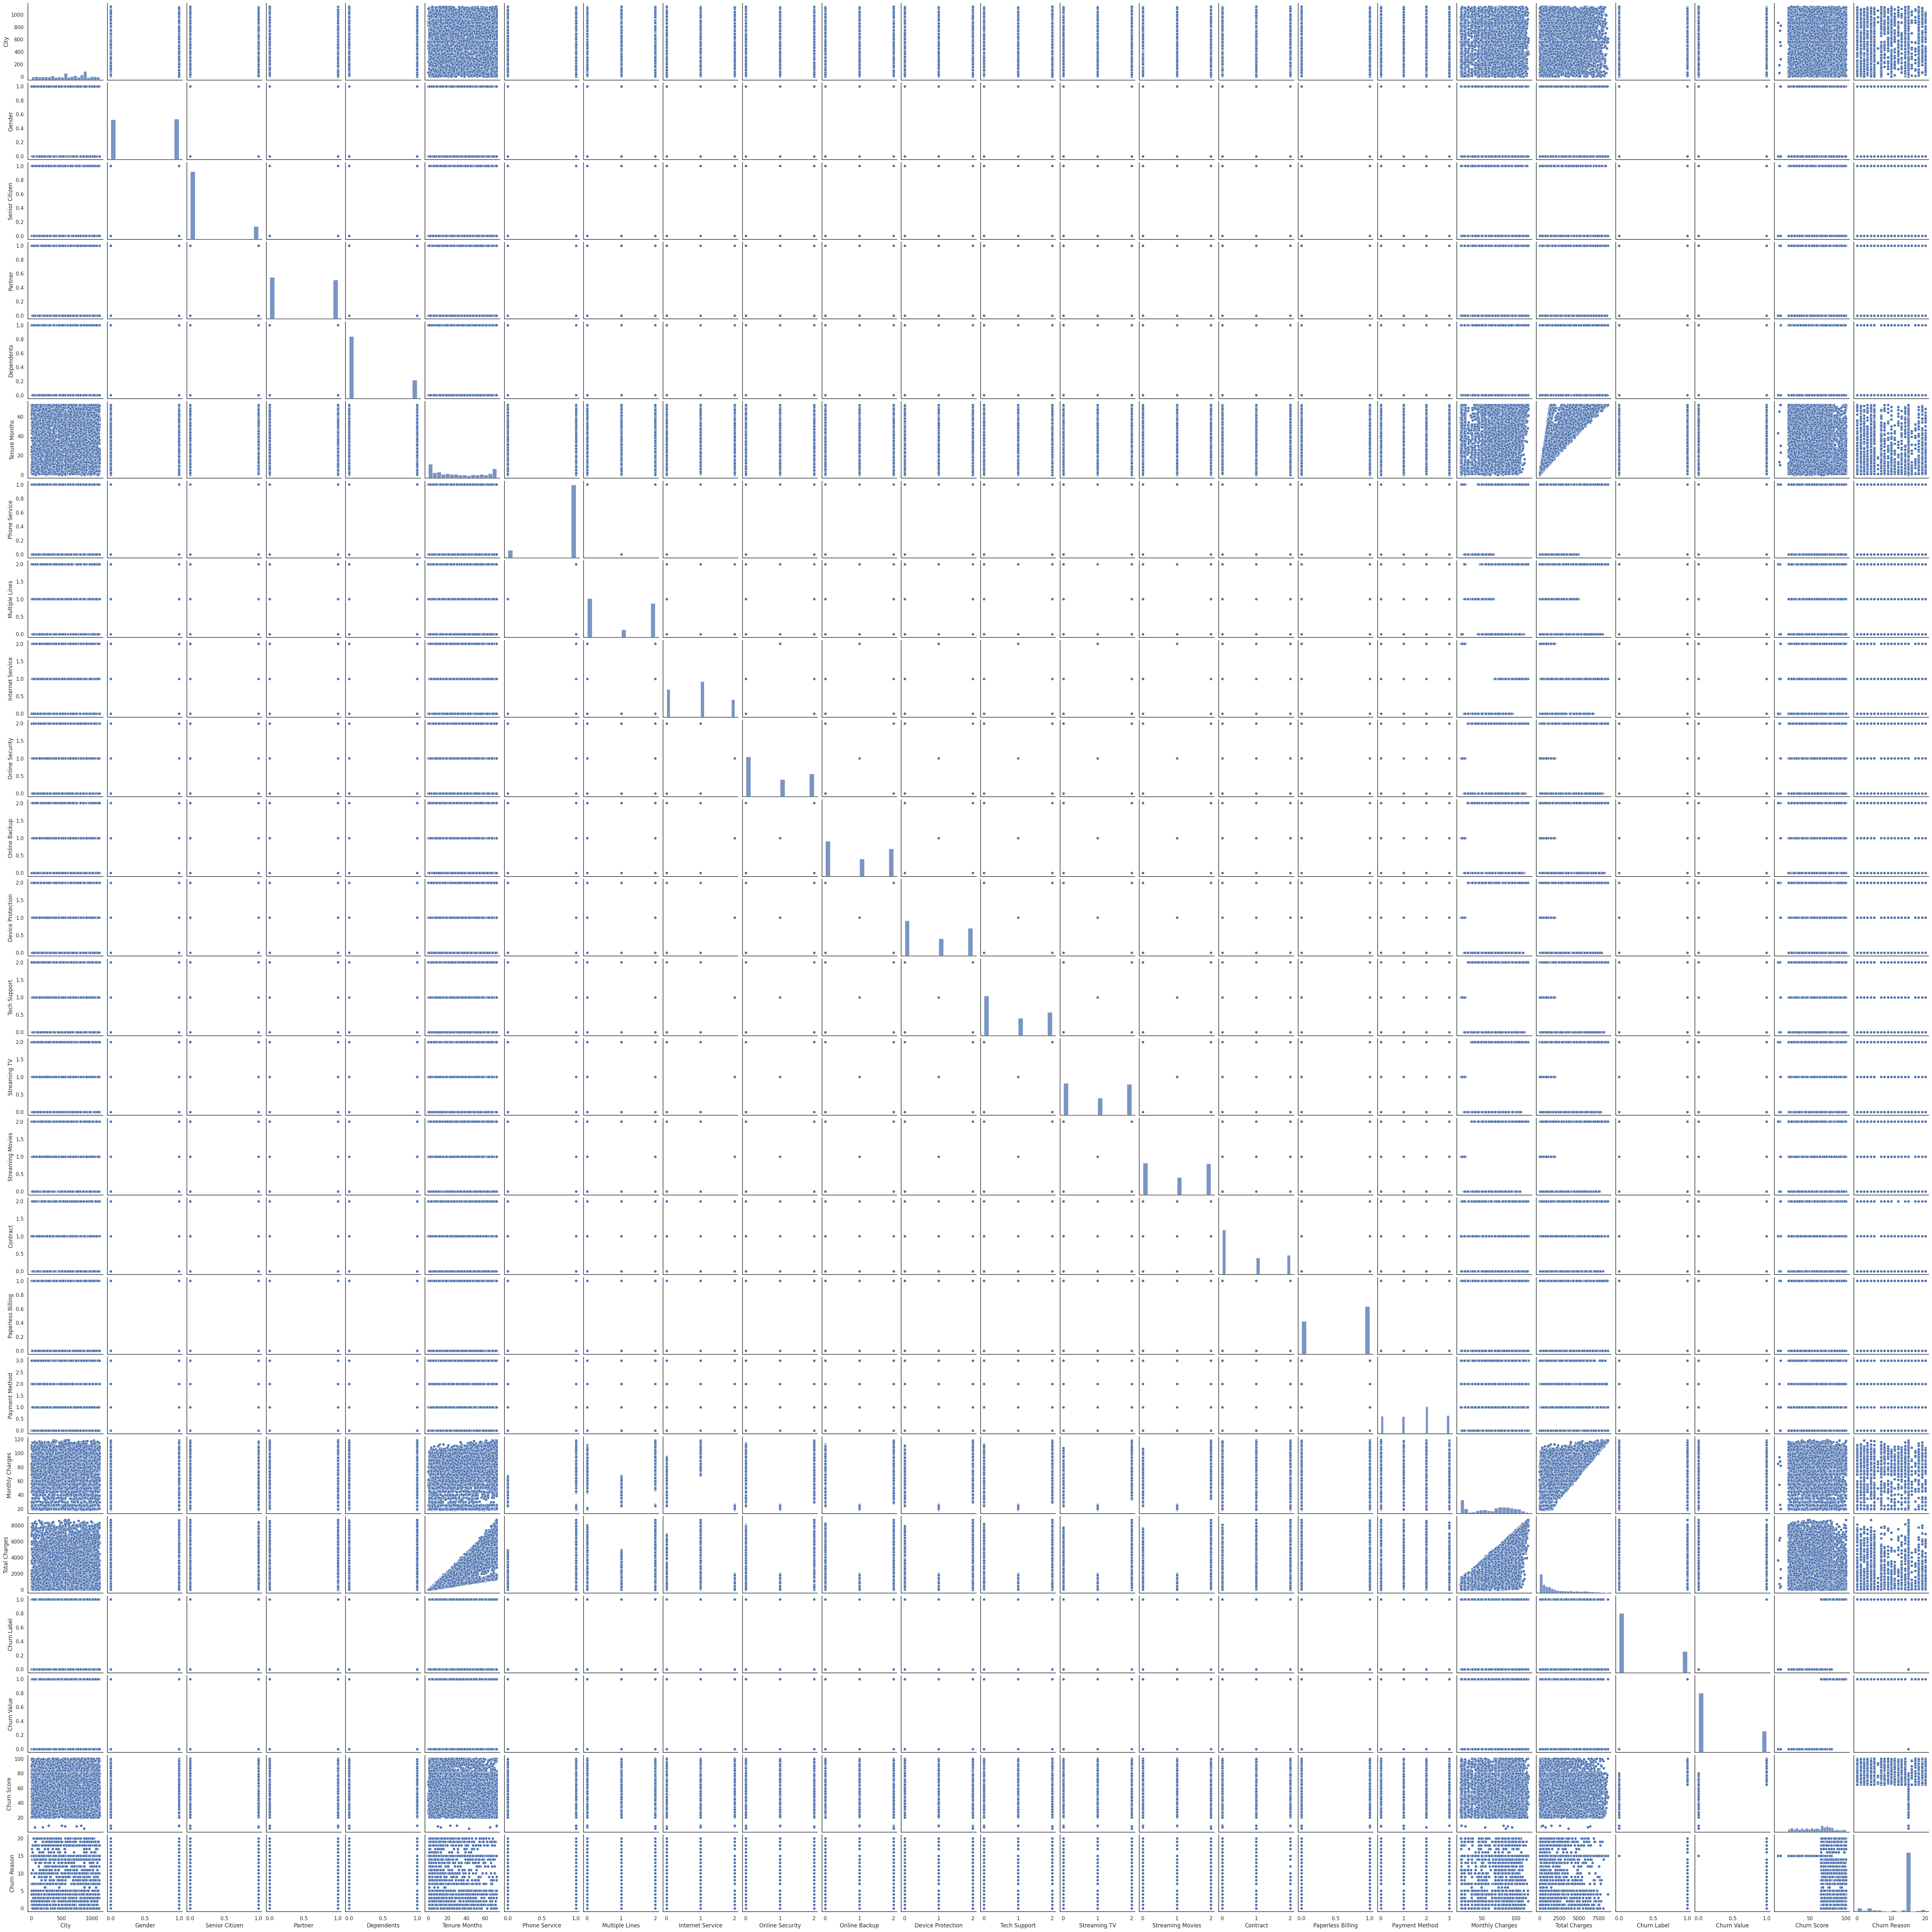

In [ ]:
#pair plot to check the colinearity
sns.pairplot(dataset)

#### Correlation matrix and heatmap shows that there is multicollinearity between two predictor variables. Highest correlation is between tenure and monthly charges.

 We can drop the churn label & churn score since we are using churn value

In [ ]:
## dropping columns
drop_cols = ['Churn Label', 'Churn Score']
dataset.drop(columns = drop_cols, inplace = True)

In [ ]:
dataset.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason'],
      dtype='object')

### Identifying predictor significance

In [ ]:

# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    dataset["Churn Value"],
    dataset[
       ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Reason']
    ],
).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Churn Value   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              537.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                        0.00
Time:                        05:52:19   Log-Likelihood:                         -1947.7
No. Observations:                7043   AIC:                                      3937.
Df Residuals:                    7022   BIC:                                      4082.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
City                  0.0001   1.17e-05     11.770      0.000       0.000       0.000
Gender                0.0410      0.008      5.445      0.000       0.026       0.056
Senior Citizen        0.0400      0.011      3.641      0.000       0.018       0.061
Partner               0.0381      0.009      4.321      0.000       0.021       0.055
Dependents           -0.0777      0.010     -7.684      0.000      -0.098      -0.058
Tenure Months         0.0057      0.000     14.949      0.000       0.005       0.006
Phone Service         0.0671      0.016      4.208      0.000       0.036       0.098
Multiple Lines        0.0215      0.005      4.551      0.000       0.012       0.031
Internet Service      0.0534      0.007      7.680      0.000       0.040       0.067
Online Security       0.0010      0.005      0.203      0.839      -0.009       0.011
Online Backup         0.0108      0.005      2.279      0.023       0.002       0.020
Device Protection     0.0058      0.005      1.187      0.235      -0.004       0.015
Tech Support         -0.0020      0.005     -0.388      0.698      -0.012       0.008
Streaming TV          0.0005      0.005      0.105      0.916      -0.010       0.011
Streaming Movies      0.0047      0.005      0.904      0.366      -0.005       0.015
Contract             -0.0352      0.007     -4.913      0.000      -0.049      -0.021
Paperless Billing     0.0752      0.008      8.941      0.000       0.059       0.092
Payment Method        0.0572      0.004     15.827      0.000       0.050       0.064
Monthly Charges       0.0085      0.000     34.397      0.000       0.008       0.009
Total Charges        -0.0001   4.64e-06    -29.989      0.000      -0.000      -0.000
Churn Reason         -0.0412      0.001    -50.953      0.000      -0.043      -0.040
==============================================================================
Omnibus:                     1242.140   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2305.229
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                       4.734   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Online Security, Tech Support, Streaming TV has greater P values and hence are non significant features.
The rest of the features are closer to 0 and are hence signifcant features.

# Building the Model
## Train ,Validation and Test split

In [ ]:
from sklearn.model_selection import train_test_split

X =   dataset[
       ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Reason']
]

y = data["Churn Value"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1)

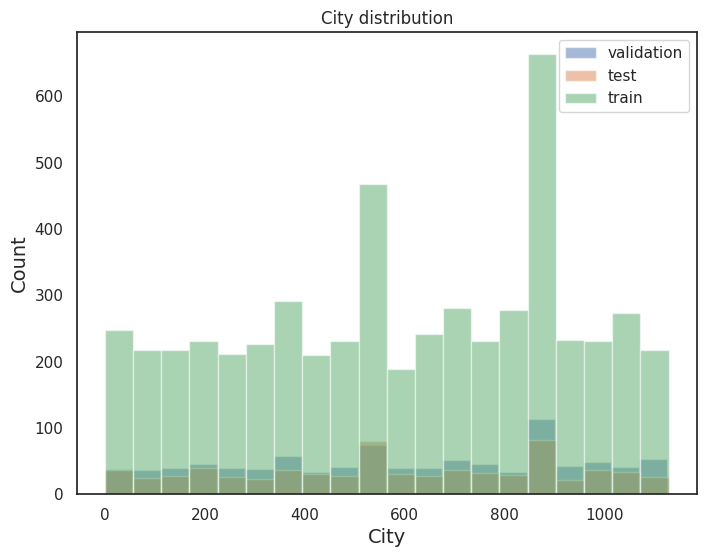

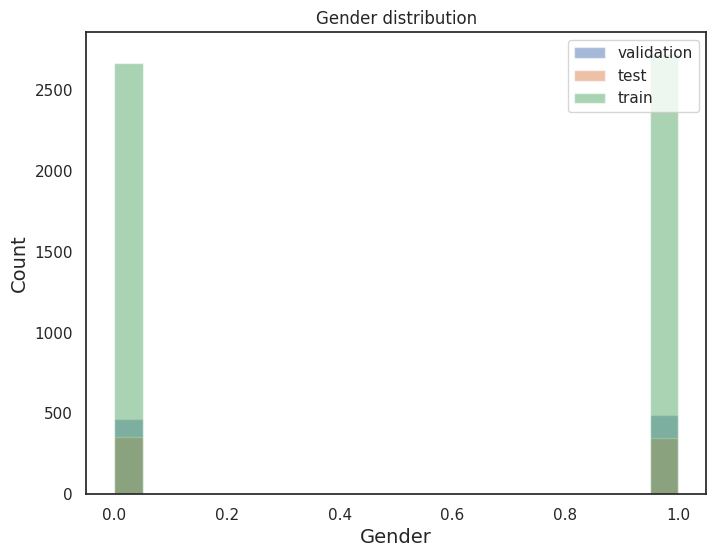

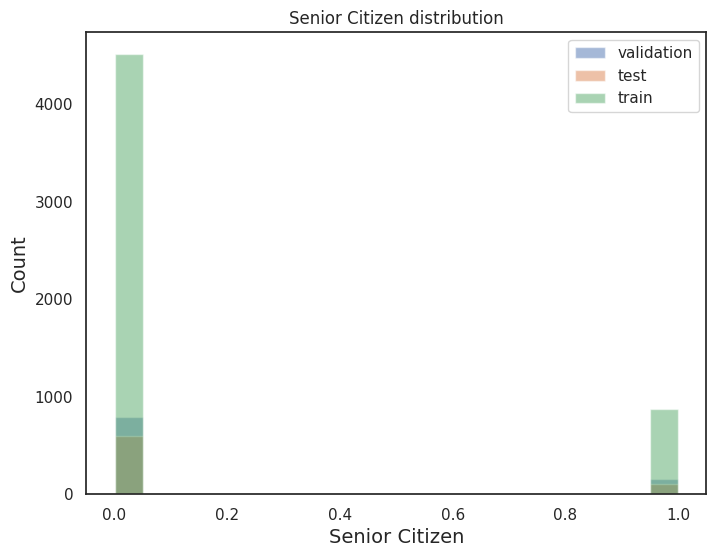

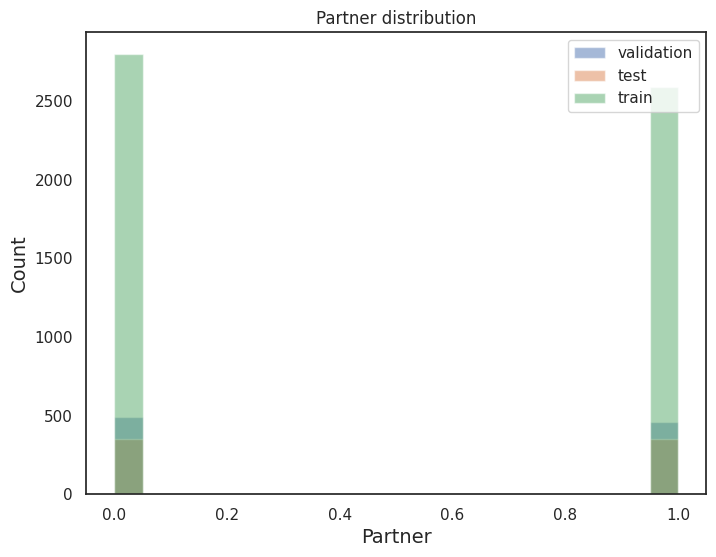

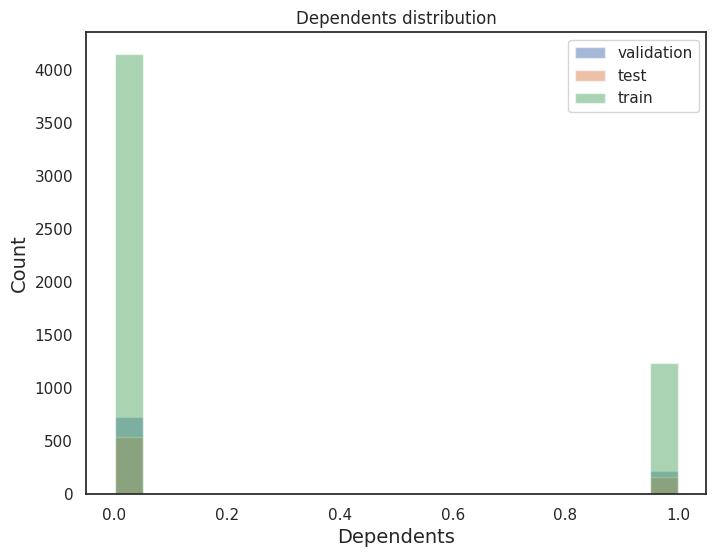

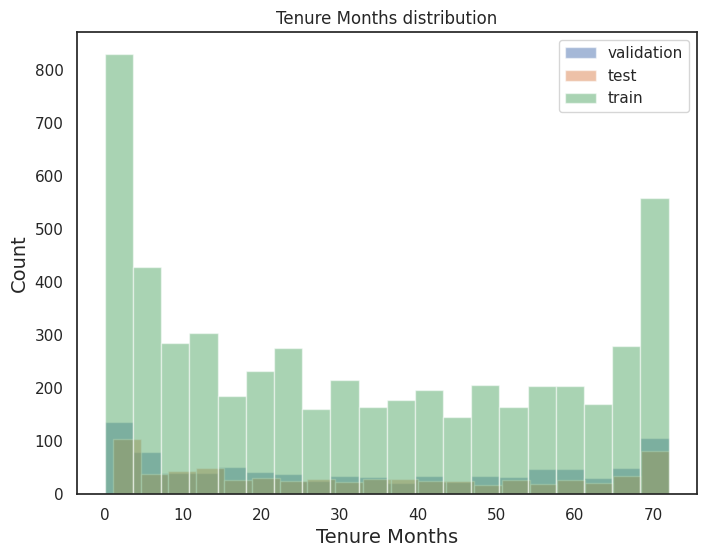

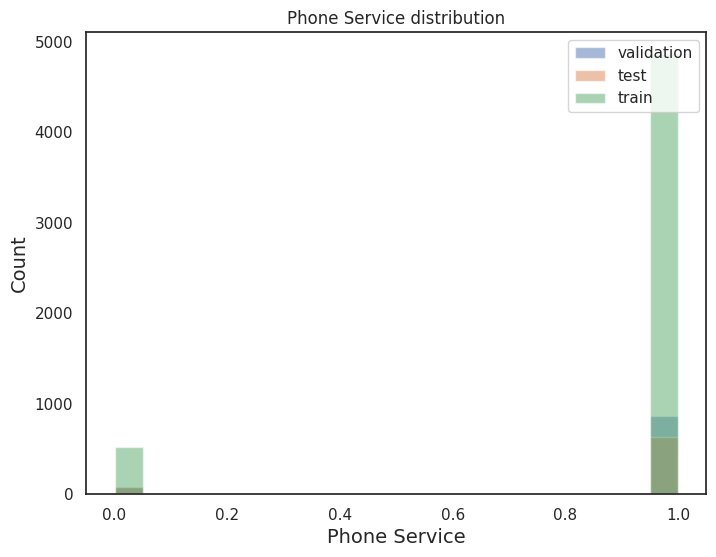

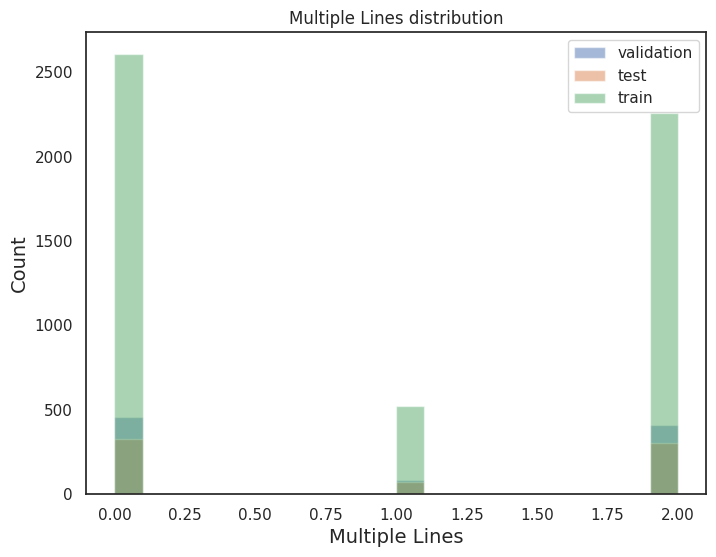

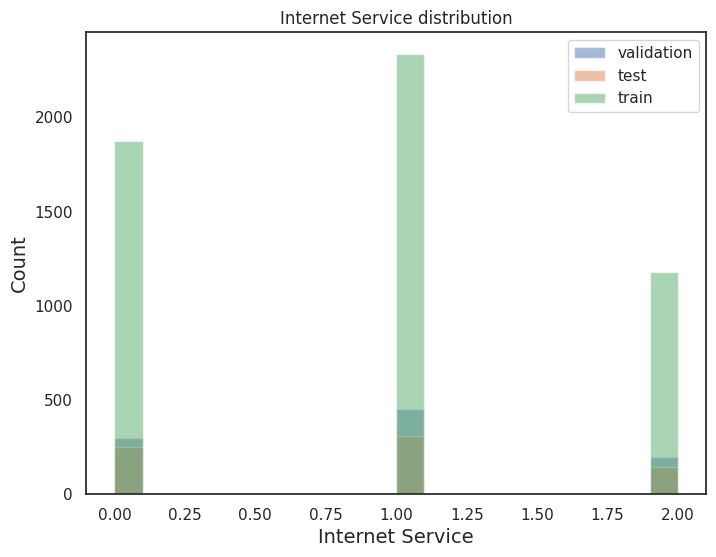

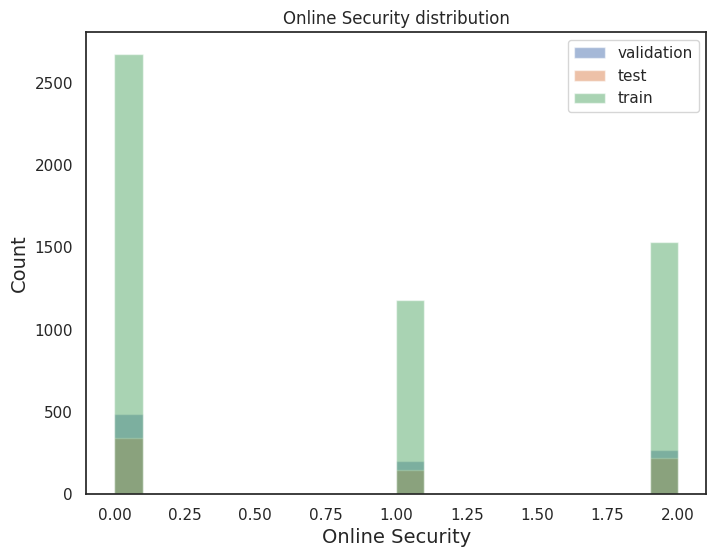

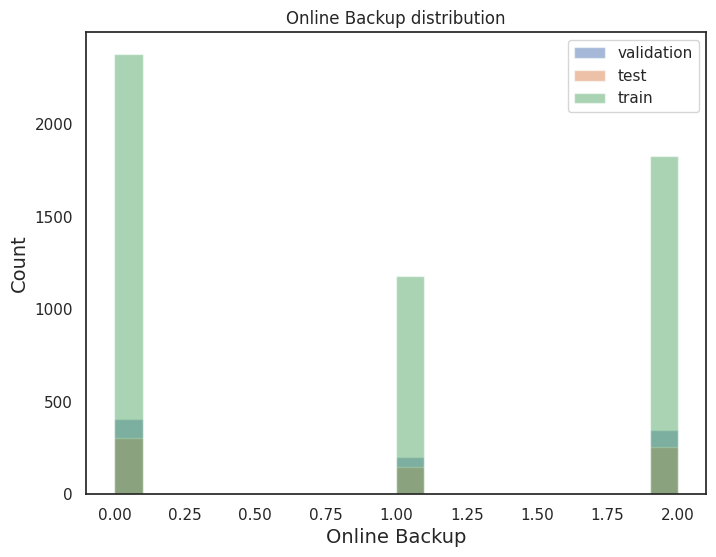

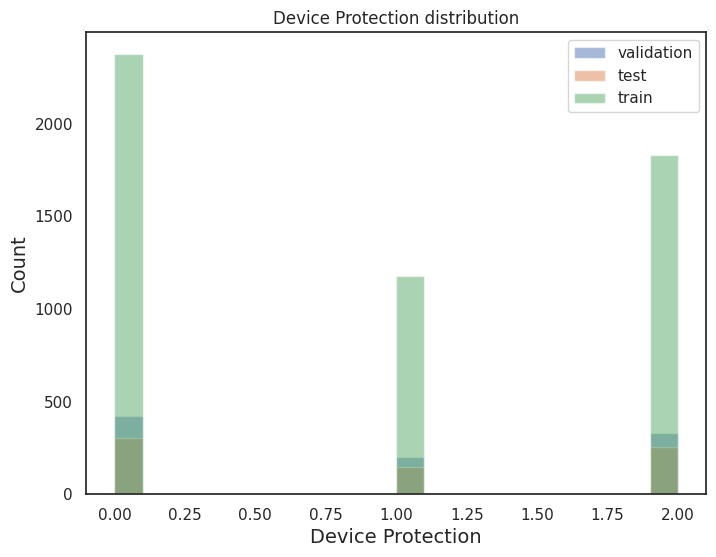

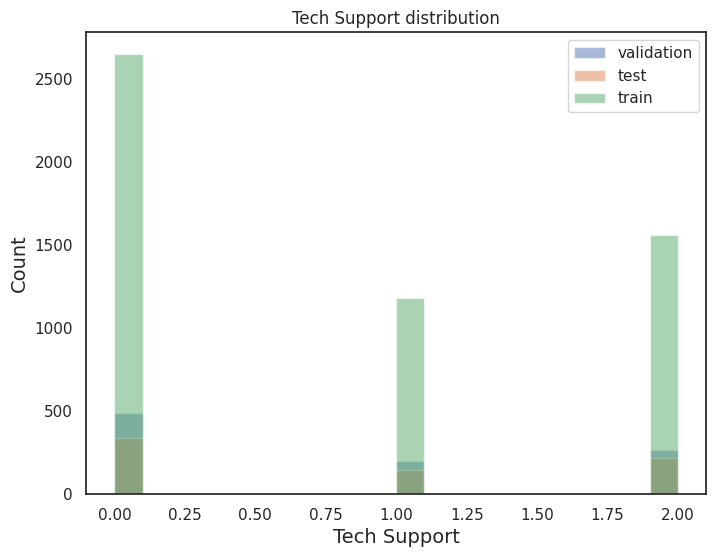

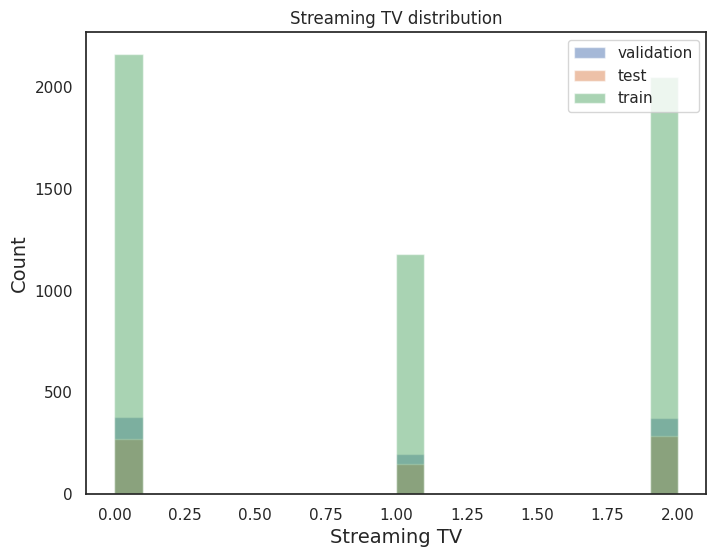

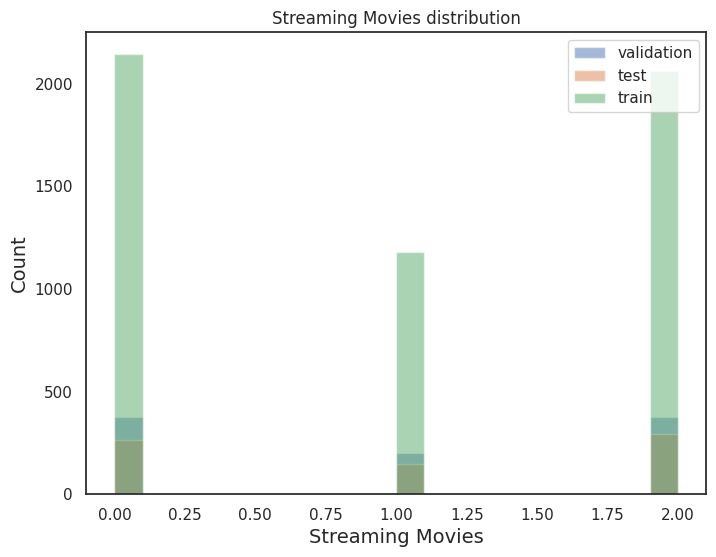

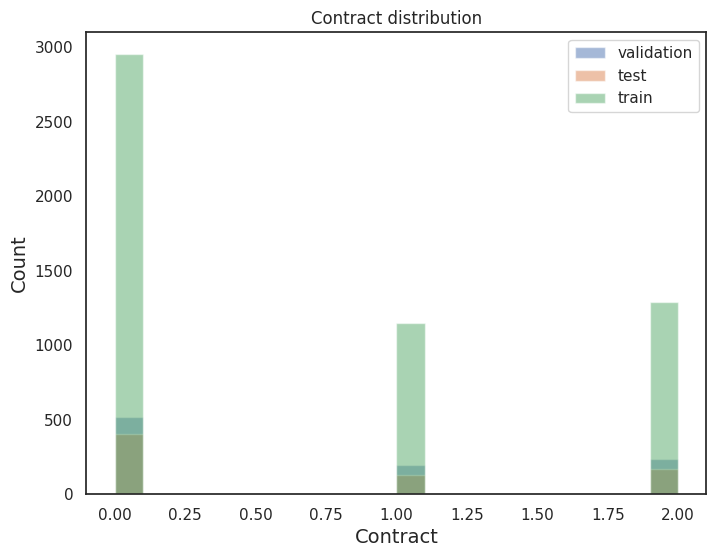

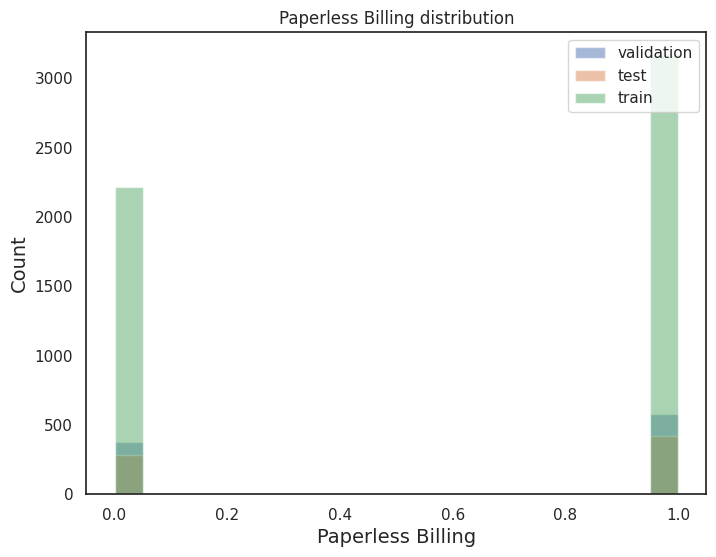

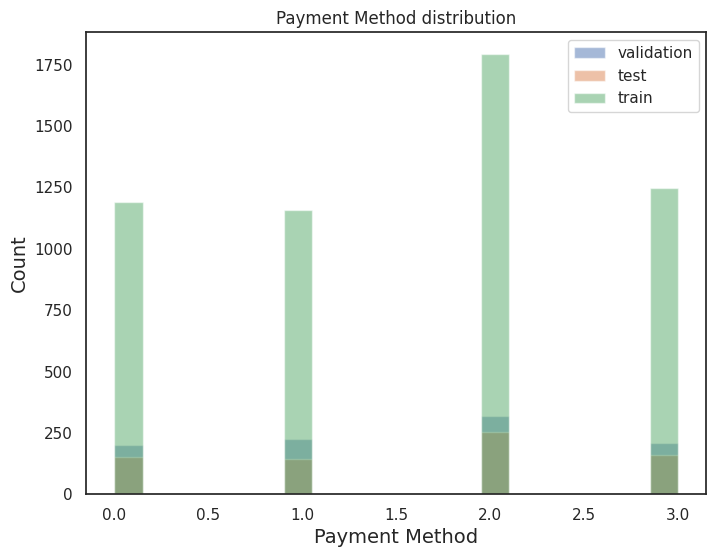

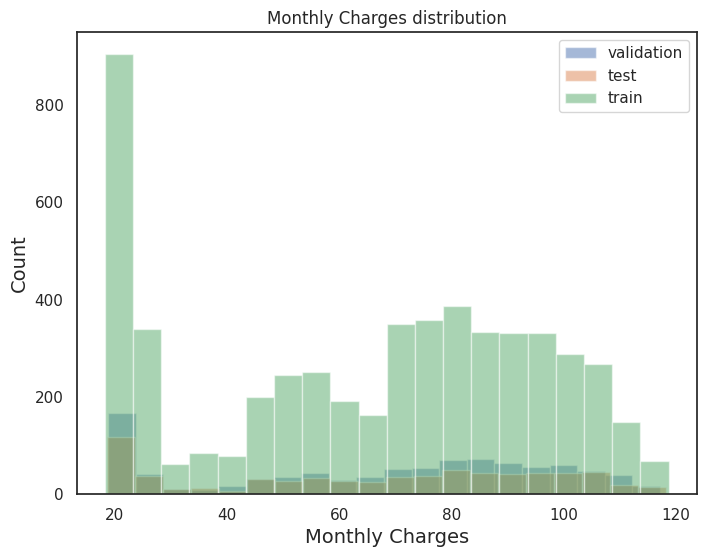

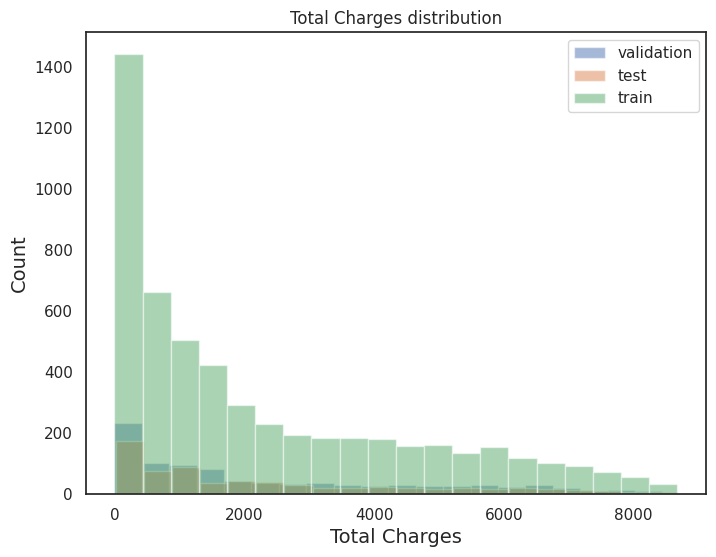

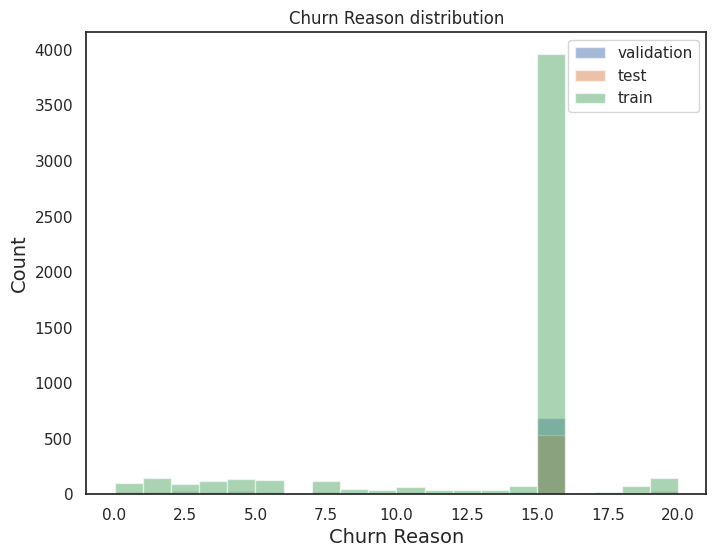

In [ ]:
# Looking through the data for test, training and validation set
X_test_plot = X_test[
       ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Reason']
]

X_val_plot = X_val[
       ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Reason']
]

X_train_plot = X_train[
       ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Reason']
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

The training and test sets have roughly the same data

## Modelling using Logistic Regression from sklearn

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.coef_
lr.intercept_

array([0.14729051])

In [ ]:
## Training metrics
roc_auc_score(y_train, lr.predict(X_train))
recall_score(y_train, lr.predict(X_train))
confusion_matrix(y_train, lr.predict(X_train))
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3960
           1       0.90      0.72      0.80      1427

    accuracy                           0.90      5387
   macro avg       0.90      0.85      0.87      5387
weighted avg       0.90      0.90      0.90      5387



In [ ]:
## Validation metrics
roc_auc_score(y_val, lr.predict(X_val))
recall_score(y_val, lr.predict(X_val))
confusion_matrix(y_val, lr.predict(X_val))
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       684
           1       0.88      0.71      0.79       267

    accuracy                           0.89       951
   macro avg       0.89      0.84      0.86       951
weighted avg       0.89      0.89      0.89       951



In [ ]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       530
           1       0.90      0.74      0.82       175

    accuracy                           0.92       705
   macro avg       0.91      0.86      0.88       705
weighted avg       0.92      0.92      0.91       705



## Feature Importance

Feature: 0, Score: 0.00052
Feature: 1, Score: 0.04668
Feature: 2, Score: 0.12981
Feature: 3, Score: 0.01049
Feature: 4, Score: -0.18858
Feature: 5, Score: 0.00222
Feature: 6, Score: 0.00619
Feature: 7, Score: 0.19036
Feature: 8, Score: 0.16476
Feature: 9, Score: -0.22569
Feature: 10, Score: -0.05234
Feature: 11, Score: -0.10048
Feature: 12, Score: -0.26252
Feature: 13, Score: 0.00829
Feature: 14, Score: 0.01859
Feature: 15, Score: -0.27764
Feature: 16, Score: 0.23012
Feature: 17, Score: 0.45542
Feature: 18, Score: 0.04436
Feature: 19, Score: -0.00046
Feature: 20, Score: -0.34619


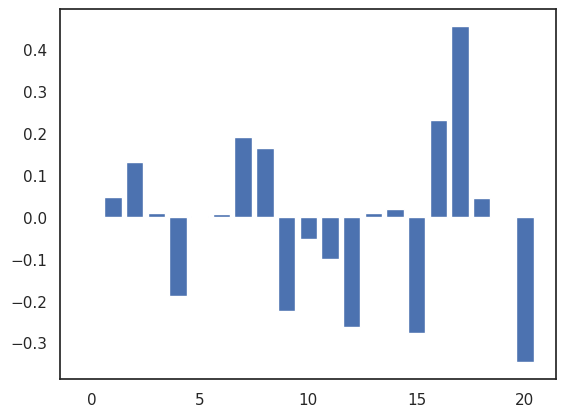

In [ ]:
# get importance
from matplotlib import pyplot
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## OUTLIERS DETECTION, REMOVAL AND MODEL RESULTS FOR DATASET AFTER REMOVING OUTLIERS


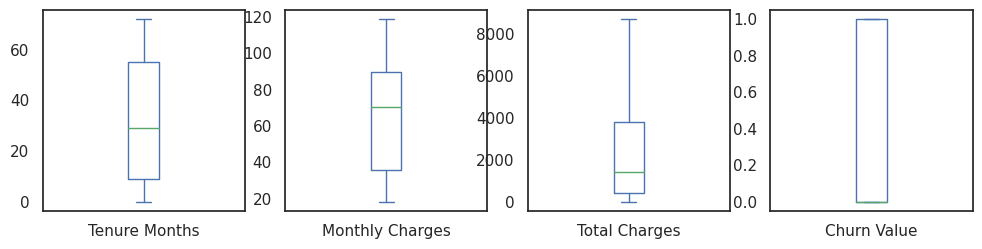

In [ ]:
#Check the box plot by normalizing all the predictors except categorical variables
dataset[[
        'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Value',
       ]].plot(kind='box', figsize=(12,12), layout=(4,4),sharex=False, subplots=True);
df_OL=dataset.copy()

We can see that there are no outliers in the numerical data

# Data Imputation
Data Imputation is a method in which the missing values in any variable or data frame are filled with numeric values for performing the task.

# 3 methods of filling values:
1. Replacing nulls in few columns with the mean
2. Replacing nulls in few columns with the mode (most frequent value)
3. Replacing nulls in few columns with zeroes

## For 1% randomly removed data

In [ ]:
X_train_missing1 = X_train.copy()

In [ ]:
#removing 1% random data
import numpy as np
for col in X_train_missing1.columns:
    X_train_missing1.loc[X_train_missing1.sample(frac=0.01).index, col] = np.nan

In [ ]:
X_train_missing1.isna().sum()

City                 54
Gender               54
Senior Citizen       54
Partner              54
Dependents           54
Tenure Months        54
Phone Service        54
Multiple Lines       54
Internet Service     54
Online Security      54
Online Backup        54
Device Protection    54
Tech Support         54
Streaming TV         54
Streaming Movies     54
Contract             54
Paperless Billing    54
Payment Method       54
Monthly Charges      54
Total Charges        54
Churn Reason         54
dtype: int64

In [ ]:
X_train_missing1

City  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
303   1050.0     1.0             0.0      1.0         0.0           60.0   
947    101.0     0.0             1.0      1.0         0.0           18.0   
2314   360.0     1.0             0.0      1.0         0.0           63.0   
5425   668.0     0.0             0.0      0.0         0.0            1.0   
5001     7.0     1.0             0.0      1.0         1.0           63.0   
...      ...     ...             ...      ...         ...            ...   
239     89.0     1.0             1.0      0.0         0.0           35.0   
744    614.0     0.0             0.0      0.0         0.0            1.0   
208   1015.0     0.0             0.0      1.0         0.0           50.0   
6098   266.0     0.0             0.0      0.0         0.0           47.0   
2484   807.0     0.0             0.0      NaN         0.0           61.0   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
303             1.0             0.0               1.0              0.0   
947             0.0             1.0               0.0              0.0   
2314            1.0             2.0               0.0              2.0   
5425            1.0             0.0               2.0              1.0   
5001            1.0             0.0               2.0              1.0   
...             ...             ...               ...              ...   
239             1.0             2.0               1.0              0.0   
744             1.0             0.0               1.0              0.0   
208             1.0             2.0               1.0              2.0   
6098            1.0             0.0               2.0              1.0   
2484            1.0             2.0               1.0              0.0   

      Online Backup  Device Protection  Tech Support  Streaming TV  \
303             2.0                0.0           0.0           2.0   
947             0.0                2.0           0.0           2.0   
2314            2.0                2.0           0.0           2.0   
5425            1.0                1.0           1.0           1.0   
5001            1.0                1.0           1.0           1.0   
...             ...                ...           ...           ...   
239             0.0                2.0           0.0           2.0   
744             0.0                0.0           0.0           0.0   
208             2.0                0.0           2.0           2.0   
6098            1.0                1.0           1.0           1.0   
2484            0.0                2.0           2.0           2.0   

      Streaming Movies  Contract  Paperless Billing  Payment Method  \
303                2.0       1.0                1.0             2.0   
947                2.0       0.0                1.0             2.0   
2314               2.0       2.0                0.0             1.0   
5425               1.0       0.0                0.0             3.0   
5001               1.0       2.0                0.0             3.0   
...                ...       ...                ...             ...   
239                2.0       0.0                1.0             2.0   
744                2.0       NaN                1.0             2.0   
208                2.0       1.0                0.0             2.0   
6098               1.0       2.0                0.0             1.0   
2484               2.0       0.0                1.0             2.0   

      Monthly Charges  Total Charges  Churn Reason  
303             94.40        5610.25           1.0  
947             48.35         810.70          20.0  
2314            83.50        5435.00          15.0  
5425            19.90          19.90          15.0  
5001            19.70        1275.85          15.0  
...               ...            ...           ...  
239             99.05        3395.80           7.0  
744             81.95          81.95          11.0  
208            108.55        5610.7

Selecting columns to replace with mean, mode or zeroes

In [ ]:
mean_cols = ['City', 'Gender', 'Senior Citizen', 'Partner', 'Paperless Billing', 'Payment Method','Monthly Charges','Churn Reason']
frequent_cols = ['Dependents', 'Tenure Months', 'Phone Service','Multiple Lines', 'Internet Service', 'Online Security']
zero_cols = ['Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract','Total Charges']

In [ ]:
for i in mean_cols:
    X_train_missing1[i].fillna(X_train_missing1[i].mean(), inplace=True)

for i in frequent_cols:
    X_train_missing1[i].fillna(X_train_missing1[i].mode()[0], inplace=True)

X_train_missing1[zero_cols] = X_train_missing1[zero_cols].fillna(0)

In [ ]:
X_train_missing1.isna().sum()

City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Reason         0
dtype: int64

In [ ]:
lr.fit(X_train_missing1, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       530
           1       0.90      0.74      0.82       175

    accuracy                           0.92       705
   macro avg       0.91      0.86      0.88       705
weighted avg       0.92      0.92      0.91       705



# For 5% randomly removed data

In [ ]:
#removing 5% random data
X_train_missing5 = X_train.copy()
for col in X_train_missing5.columns:
    X_train_missing5.loc[X_train_missing5.sample(frac=0.05).index, col] = np.nan

In [ ]:
for i in mean_cols:
    X_train_missing5[i].fillna(X_train_missing5[i].mean(), inplace=True)

for i in frequent_cols:
    X_train_missing5[i].fillna(X_train_missing5[i].mode()[0], inplace=True)

X_train_missing5[zero_cols] = X_train_missing5[zero_cols].fillna(0)

In [ ]:
lr.fit(X_train_missing5, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       530
           1       0.90      0.73      0.81       175

    accuracy                           0.91       705
   macro avg       0.91      0.85      0.88       705
weighted avg       0.91      0.91      0.91       705



# For 10% randomly imputed data

In [ ]:
#removing 10% random data
X_train_missing10 = X_train.copy()
for col in X_train_missing10.columns:
    X_train_missing10.loc[X_train_missing10.sample(frac=0.1).index, col] = np.nan

In [ ]:
for i in mean_cols:
    X_train_missing10[i].fillna(X_train_missing10[i].mean(), inplace=True)

for i in frequent_cols:
    X_train_missing10[i].fillna(X_train_missing10[i].mode()[0], inplace=True)

X_train_missing10[zero_cols] = X_train_missing10[zero_cols].fillna(0)

In [ ]:
lr.fit(X_train_missing10, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       530
           1       0.92      0.73      0.81       175

    accuracy                           0.92       705
   macro avg       0.92      0.85      0.88       705
weighted avg       0.92      0.92      0.91       705



### The imputation methods work very well on 1%, 5% which have the same accuracy level of ~92% but the accuracy reducesto 81% on 10% imputed data. There is also a slight difference in the precision and recall metrics as shown above.

# Final Answers
1. What are the data types? (Only numeric and categorical)
    * Numerical
    
    Count	Zip Code	Latitude	Longitude	Tenure Months	Monthly Charges	Churn Value	Churn Score	CLTV
    
    * Categorical

    'CustomerID',
    'Country',
    'State',
    'City',
    'Lat Long',
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Total Charges',
    'Churn Label'
        
2. Are there missing values?
    Yes, there are missing values in the dataset in the Churn Reason column

3. What are the likely distributions of the numeric variables?
    - Tenure Months: Normal Distribution
    - Monthly Charges: Normal Distribution
    - Total Charges: Right skewed
    - Churn Value: Binomial
    - Churn Score: Skewed normal


4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
 After using Pearsons correlation, Correlation matrix and Logit estimation of p -values using OLS method, we can conclude that 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents','Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service','Online Backup', 'Device Protection', 'Streaming Movies', 'Contract', 'Paperless Billing','Payment Method', 'Monthly Charges', 'Total Charges',
'Churn Reason'  are important/significant features.

5. Which independent variables have missing data? How much?
    - Yes, there are missing values in the dataset in the Churn Reason column
    
6. Do the training and test sets have the same data?
    - Yes, we can infer this from the box plots for all sets above.

7. Are the predictor variables independent of all the other predictor variables?
    - No, we can infer this from the correlation matrix that the a few predictor variables have high correlation.
    - Tenure Months and Total Charges:
    Correlation: 0.83
    This strong positive correlation suggests that Total Charges are likely dependent on Tenure Months. Customers who have been with the company longer tend to have higher total charges.

    - Tenure Months and Contract:

    Correlation: 0.67
    This positive correlation suggests that Contract duration might be influenced by the length of time a customer has been with the company. Longer-tenured customers may opt for longer contract durations.

    - Monthly Charges and Total Charges:

    Correlation: 0.65
    This strong positive correlation suggests that Total Charges are influenced by Monthly Charges. Higher monthly charges lead to higher total charges over time.


8. Which predictor variables are the most important?
    
We can identify the most important predictors in the OLS regression summary by looking at the magnitude of the coefficients (coefs) and their associated p-values (P>|t|).

Based on the coefficients and p-values, the most important predictors seem to be:

 - Tenure Months
 - Monthly Charges
 - Total Charges
 - Churn Reason

These predictors have relatively high coefficients and statistically significant p-values, indicating their importance in predicting the dependent variable (Churn Value).


9. Do the ranges of the predictor variables make sense?
     Yes, all the features including Tenure Months, Monthly Charges, Total Charges and Churn Reason are within their normal ranges and do not have any outliers.

10. What are the distributions of the predictor variables?
    - Tenure Months: Normal Distribution
    - Monthly Charges: Normal Distribution
    - Total Charges: Right skewed


11.  Remove outliers and keep outliers (does if have an effect of the final predictive model)?
    - There are no outliers in the data.

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.
        - Explained in previous cell



# References
1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation
4. https://www.youtube.com/watch?v=-Bjko05HKWM&ab_channel=KrishNaik
5. https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c#:~:text=Definition%20of%20Train%2DValid%2DTest,of%20these%20datasets%20is%20below.

MIT License

Copyright (c) 2024 babsyvbabu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.